In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import sys

from simplerl import (DQNAgent, 
                      DQNNet,
                      OrnsteinUhlenbeckProcess,
                      ExponentialScheduler,
                      ConstantScheduler, 
                      LinearScheduler,
                      train,
                      GymMonitorHook)

%matplotlib inline

In [2]:
def plot_raw_scores(ax, monitor_hooks, window = 100):
    scores = [m.scores for m in monitor_hooks]
    min_eps_len = min([len(s) for s in scores])
    running_avgs = [pd.Series(s[:min_eps_len]).rolling(window, min_periods = 1).mean() 
                    for s in scores]
    
    for avg in running_avgs:
        ax.plot(avg)

def plot_scores(ax, monitor_hooks, window = 100):
    scores = [m.scores for m in monitor_hooks]
    min_eps_len = min([len(s) for s in scores])
    running_avgs = [pd.Series(s[:min_eps_len]).rolling(window, min_periods = 1).mean() 
                    for s in scores]
    
    average = np.array(running_avgs).mean(axis = 0)
    median = np.median(np.array(running_avgs), axis = 0)
    max_band = np.array(running_avgs).max(axis = 0)
    min_band = np.array(running_avgs).min(axis = 0)
    
    ax.plot(average, label = 'Mean Running Score')
    ax.plot(median, label = 'Median Running Score')
    ax.fill_between(np.arange(min_eps_len) + 1, 
                    min_band, max_band,
                    alpha = 0.5)

In [3]:
env_fn = lambda: gym.make('LunarLander-v2')
model_fn = lambda: DQNNet(8, 4, (128, 64))

In [4]:
monitors = []

for i in range(5):
    agent = DQNAgent(env_fn = env_fn, 
                     model_fn = model_fn, 
                     n_actors = 1,
                     n_actions = 4,
                     epsilon = ExponentialScheduler(1.0, 1e-3, .995),
                     double_q = False,
                     gamma = 0.99,
                     batch_size = 64,
                     n_steps = 1,
                     replay_memory = 100000,
                     use_per = False,
                     alpha = 0.6,
                     beta = LinearScheduler(0.4, 1.0, 100000),
                     replay_start = 1000,
                     param_update_freq = 1000,
                     buffer_update_freq = 1000,
                     optimizer = optim.Adam,
                     learning_rate = 1e-3,
                     weight_decay = 1e-4,
                     clip_gradients = 5.0,
                     update_freq = 4)

    monitors.append(GymMonitorHook(verbose = 50, vector_env = True))
    
    agent.train()
    print('Training Agent {}'.format(i + 1))
    train(agent, agent.env, train_steps = 500000, hooks = [monitors[-1]], vector_env = True)
    print('')

Training Agent 1
Episode 50 | Time Steps: 85 | Average Score: -204.01
Episode 100 | Time Steps: 722 | Average Score: -181.52
Episode 150 | Time Steps: 851 | Average Score: -161.39
Episode 200 | Time Steps: 1000 | Average Score: -145.26
Episode 250 | Time Steps: 1000 | Average Score: -115.33
Episode 300 | Time Steps: 1000 | Average Score: -96.34
Episode 350 | Time Steps: 1000 | Average Score: -70.77
Episode 400 | Time Steps: 1000 | Average Score: -43.10
Episode 450 | Time Steps: 1000 | Average Score: -26.26
Episode 500 | Time Steps: 1000 | Average Score: -21.52
Episode 550 | Time Steps: 653 | Average Score: -4.48
Episode 600 | Time Steps: 586 | Average Score: 76.48
Episode 650 | Time Steps: 412 | Average Score: 129.60
Episode 691 | Time Steps: 4 | Average Score: 127.89

Training Agent 2
Episode 50 | Time Steps: 509 | Average Score: -184.30
Episode 100 | Time Steps: 1000 | Average Score: -129.31
Episode 150 | Time Steps: 1000 | Average Score: -53.02
Episode 200 | Time Steps: 1000 | Avera

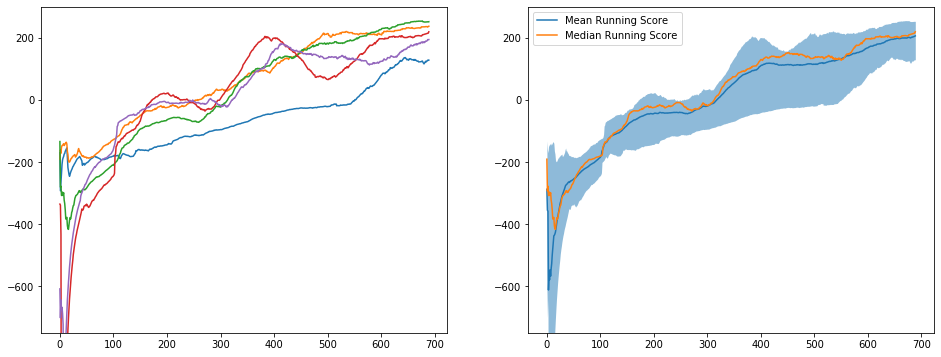

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
plot_raw_scores(ax[0], monitors)
plot_scores(ax[1], monitors)

ax[0].set_ylim([-750, 300])
ax[1].set_ylim([-750, 300])

plt.legend(loc = 'upper left')
plt.show()

In [77]:
monitors = []

for i in range(5):
    agent = DQNAgent(env_fn = env_fn, 
                     model_fn = model_fn, 
                     n_actors = 1,
                     n_actions = 4,
                     epsilon = ExponentialScheduler(1.0, 1e-3, .995),
                     double_q = True,
                     gamma = 0.99,
                     batch_size = 64,
                     n_steps = 1,
                     replay_memory = 100000,
                     use_per = False,
                     alpha = 0.6,
                     beta = LinearScheduler(0.4, 1.0, 100000),
                     replay_start = 1000,
                     param_update_freq = 1000,
                     buffer_update_freq = 1000,
                     optimizer = optim.Adam,
                     learning_rate = 1e-3,
                     weight_decay = 1e-4,
                     clip_gradients = 5.0,
                     update_freq = 4)

    monitors.append(GymMonitorHook(verbose = 50, vector_env = True))
    
    agent.train()
    print('Training Agent {}'.format(i + 1))
    train(agent, agent.env, train_steps = 500000, hooks = [monitors[-1]], vector_env = True)
    print('')

Training Agent 1
Episode 50 | Time Steps: 717 | Average Score: -229.74
Episode 100 | Time Steps: 1000 | Average Score: -161.86
Episode 150 | Time Steps: 1000 | Average Score: -108.88
Episode 200 | Time Steps: 939 | Average Score: -80.40
Episode 250 | Time Steps: 352 | Average Score: 59.05
Episode 300 | Time Steps: 318 | Average Score: 118.32
Episode 350 | Time Steps: 751 | Average Score: 93.75
Episode 400 | Time Steps: 872 | Average Score: 98.83
Episode 450 | Time Steps: 214 | Average Score: 121.71
Episode 500 | Time Steps: 272 | Average Score: 162.21
Episode 550 | Time Steps: 265 | Average Score: 200.53
Episode 600 | Time Steps: 153 | Average Score: 225.57
Episode 650 | Time Steps: 269 | Average Score: 224.12
Episode 700 | Time Steps: 190 | Average Score: 224.08
Episode 750 | Time Steps: 247 | Average Score: 234.02
Episode 800 | Time Steps: 266 | Average Score: 241.04
Episode 850 | Time Steps: 412 | Average Score: 235.59
Episode 900 | Time Steps: 332 | Average Score: 243.35
Episode 95

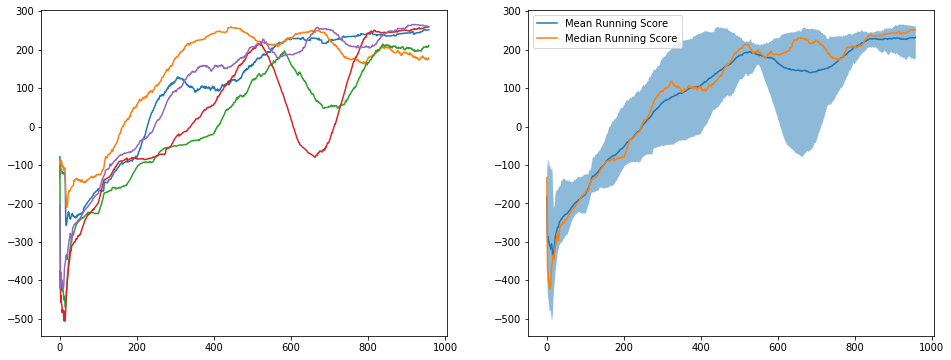

In [78]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
plot_raw_scores(ax[0], monitors)
plot_scores(ax[1], monitors)
plt.legend(loc = 'upper left')
plt.show()

In [24]:
monitors = []

for i in range(5):
    agent = DQNAgent(env_fn = env_fn, 
                     model_fn = model_fn, 
                     n_actors = 16,
                     n_actions = 4,
                     epsilon = ExponentialScheduler(1.0, 1e-3, .995),
                     double_q = True,
                     gamma = 0.99,
                     batch_size = 64,
                     n_steps = 5,
                     replay_memory = 100000,
                     use_per = True,
                     alpha = 0.6,
                     beta = LinearScheduler(0.4, 1.0, 250000),
                     replay_start = 1000,
                     param_update_freq = 1000,
                     buffer_update_freq = 1000,
                     optimizer = optim.Adam,
                     learning_rate = 1e-3,
                     weight_decay = 1e-4,
                     clip_gradients = 5.0,
                     update_freq = 4)

    monitors.append(GymMonitorHook(verbose = 50, vector_env = True))
    
    agent.train()
    print('Training Agent {}'.format(i + 1))
    train(agent, agent.env, train_steps = 250000, hooks = [monitors[-1]], vector_env = True)
    print('')

Training Agent 1
Episode 50 | Time Steps: 85 | Average Score: -251.12
Episode 100 | Time Steps: 163 | Average Score: -209.75
Episode 150 | Time Steps: 1000 | Average Score: -172.16
Episode 200 | Time Steps: 427 | Average Score: -112.13
Episode 250 | Time Steps: 796 | Average Score: 12.05
Episode 300 | Time Steps: 343 | Average Score: 136.03
Episode 350 | Time Steps: 755 | Average Score: 212.38
Episode 400 | Time Steps: 279 | Average Score: 218.90
Episode 450 | Time Steps: 258 | Average Score: 233.41
Episode 500 | Time Steps: 230 | Average Score: 257.88
Episode 550 | Time Steps: 201 | Average Score: 268.35
Episode 600 | Time Steps: 274 | Average Score: 274.62
Episode 650 | Time Steps: 258 | Average Score: 275.26
Episode 700 | Time Steps: 232 | Average Score: 273.70
Episode 750 | Time Steps: 275 | Average Score: 250.88
Episode 800 | Time Steps: 210 | Average Score: 243.53
Episode 842 | Time Steps: 112 | Average Score: 256.72

Training Agent 2
Episode 50 | Time Steps: 78 | Average Score: 

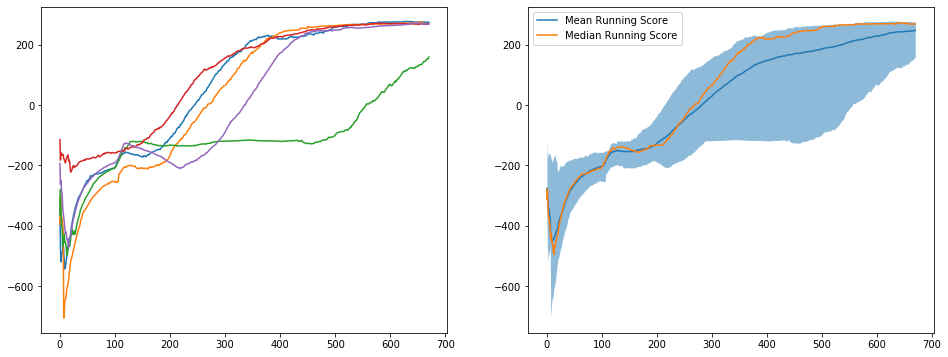

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
plot_raw_scores(ax[0], monitors)
plot_scores(ax[1], monitors)
plt.legend(loc = 'upper left')
plt.show()